<a href="https://colab.research.google.com/github/olyvias/python/blob/main/TUGAS13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy dan Matplotlib (Path Loss Simulation)
## OLYVIA FERNANDA SOEDRADJAT / 1101208479 / TTX-44-01

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.zeros(4)

array([0., 0., 0., 0.])

In [3]:
np.ones(3)

array([1., 1., 1.])

**(Baris,Kolom)**

In [4]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
np.ones((5,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [6]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
np.arange(2,10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.arange(3,47,4)

array([ 3,  7, 11, 15, 19, 23, 27, 31, 35, 39, 43])

Arange = (Awal,Akhir,delta)

In [9]:
np.arange(4,5,0.1)

array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [10]:
np.arange(2,-4,-0.5)

array([ 2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. , -2.5, -3. ,
       -3.5])

In [11]:
np.linspace(2,10,4)

array([ 2.        ,  4.66666667,  7.33333333, 10.        ])

In [12]:
np.linspace(2,-4,4)

array([ 2.,  0., -2., -4.])

In [13]:
e=np.arange(0,20,2)

In [14]:
len(e)

10

In [15]:
e.reshape(5,2)

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18]])

In [16]:
e.reshape(2,5)

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])

In [17]:
print(e)

[ 0  2  4  6  8 10 12 14 16 18]


In [18]:
f=e.reshape(5,2)

In [19]:
print(f)

[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]
 [16 18]]


In [20]:
np.random.random((3,4))

array([[0.99565727, 0.80544912, 0.45793873, 0.02192077],
       [0.62642255, 0.04872368, 0.04537584, 0.01710747],
       [0.20421878, 0.18480457, 0.77642284, 0.30380733]])

In [21]:
np.random.randint(1,20,10)

array([14,  1,  3, 15, 19, 18,  3,  2,  8, 17])

In [22]:
np.random.randn(3)

array([ 0.55735639, -0.90860589,  0.60723208])

# **GRAFIK FREKUENSI 1800MHz (URBAN, OPEN, DAN SUB URBAN)**

In [23]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [24]:
f=1800 #MHz
loc1='urban'
loc2='open'
loc3='suburban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [25]:
print(d)

[270 663 466 245 565 565 567 633 546 252 283 294 474 592 656 625 540 321
 376 266 544 629 507 544 648 224 320 596 527 315 488 648 380 272 309 368
 359 309 431 224 316 456 538 276 465 292 397 489 375 227 613 634 304 470
 680 440 269 492 321 243 409 584 244 639 547 698 603 246 651 587 364 575
 419 370 461 217 591 244 233 404 654 206 588 680 533 348 412 579 639 359
 692 492 432 593 369 602 495 531 428 591 400 329 651 387 447 470 576 575
 601 566 405 689 648 673 638 309 460 461 477 611 350 310 222 470 398 541
 263 690 490 389 296 686 551 203 454 331 227 251 398 268 515 335 657 335
 253 361 523 683 238 695 685 232 620 475 574 659 637 275 590 562 455 279
 393 208 419 273 489 293 431 374 256 507 514 688 486 278 527 329 246 296
 546 232 623 539 633 597 269 675 319 465 231 215 334 379 428 208 354 283
 349 402]


In [26]:
LpUrban=cos(f,loc1,tower,user,d)
LpOpen=cos(f,loc2,tower,user,d)
LpSuburban=cos(f,loc3,tower,user,d)

In [27]:
print(LpUrban, LpOpen, LpSuburban)

[173.86803663 186.52245082 181.5557934  172.49936498 184.26936756
 184.26936756 184.31914231 185.87019368 183.78752308 172.89618665
 174.53044108 175.06758974 181.79556493 184.92692586 186.37293666
 185.69103403 183.63187246 176.30522567 178.53293625 173.65779037
 183.73583041 185.78089869 182.74362058 183.73583041 186.20009722
 171.23706683 176.26127482 185.02178304 183.2886107  176.03943972
 182.20558832 186.20009722 178.68199836 173.97199457 175.76854219
 178.22999474 177.88121175 175.76854219 180.45597456 171.23706683
 176.0840871  181.25022312 183.57960436 174.17763673 181.52553294
 174.97143758 179.29848294 182.23442403 178.49542295 171.42446965
 185.41794817 185.89242926 175.53874529 181.67618932 186.87908348
 180.74708972 173.81576852 182.32057865 176.30522567 172.38390337
 179.71795525 184.73527342 172.44175248 186.0030837  183.81329845
 187.24710481 185.18626141 172.55674281 186.26516079 184.807449
 178.07604525 184.51650088 180.05821908 178.30634309 181.40383683
 170.7898471

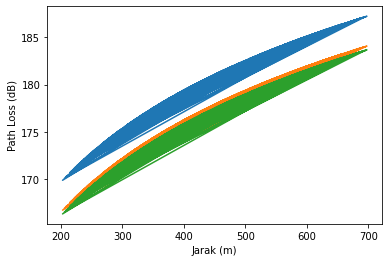

In [28]:
plt.figure()
plt.plot(d,LpUrban)
plt.plot(d,LpOpen)
plt.plot(d,LpSuburban)
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [29]:
d_sort=d[np.argsort(d)]
Urban_sort1=LpUrban[np.argsort(d)]
Open_sort2=LpOpen[np.argsort(d)]
Suburban_sort3=LpSuburban[np.argsort(d)]

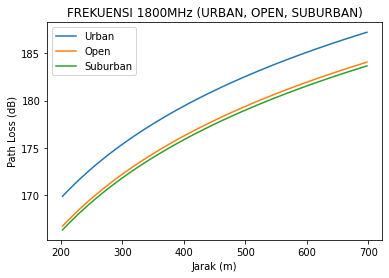

In [30]:
plt.figure()
plt.title('FREKUENSI 1800MHz (URBAN, OPEN, SUBURBAN)')
plt.plot(d_sort,Urban_sort1, label='Urban')
plt.plot(d_sort,Open_sort2, label="Open")
plt.plot(d_sort,Suburban_sort3, label="Suburban")
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

# **GRAFIK MODEL URBAN (700MHz, 900MHz, dan 1800MHz)**

In [31]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [32]:
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [33]:
print(d)

[586 445 509 649 295 619 545 336 486 202 597 299 645 245 247 346 630 373
 410 411 476 609 622 571 208 635 656 285 432 245 290 240 221 661 461 396
 333 573 356 241 475 241 558 553 606 327 230 640 354 614 204 215 534 645
 352 213 392 597 238 577 506 399 270 455 595 393 293 563 698 432 280 476
 641 621 208 294 253 329 285 411 289 335 236 267 351 698 458 371 259 323
 434 678 620 616 304 688 411 244 375 567 506 228 316 490 681 594 329 559
 609 252 653 342 621 578 572 492 352 414 219 672 435 275 614 609 343 466
 275 677 353 356 412 430 534 258 226 205 216 615 570 562 451 332 246 615
 537 213 465 326 446 230 598 544 297 406 488 504 680 314 441 217 231 531
 210 647 585 486 357 640 304 270 480 226 472 408 350 360 358 394 272 412
 634 317 315 653 576 627 202 380 220 260 555 278 462 232 467 521 308 428
 696 456]


In [34]:
LpUrban700=cos(f1,loc,tower,user,d)
LpUrban900=cos(f2,loc,tower,user,d)
LpUrban1800=cos(f3,loc,tower,user,d)

In [35]:
print(LpUrban700, LpUrban900, LpUrban1800)

[172.14437405 168.26720045 170.16002079 173.58276099 162.47636332
 172.91609537 171.12264296 164.30948716 169.50868172 157.14179728
 172.40634037 162.66607983 173.49567424 159.86030749 159.97483038
 164.72260292 173.16421806 165.7810378  167.1132964  167.14761125
 169.215818   172.68667275 172.9841998  171.77910974 157.55410684
 173.2755723  173.73387917 161.99058285 167.8495619  159.86030749
 162.23556707 159.56985931 158.40807966 173.84083669 168.76477933
 166.62389897 164.18315235 171.82836237 165.12394737 159.62843003
 169.18619393 159.62843003 171.4547002  171.32791053 172.61711095
 163.92703188 158.97035447 173.38605316 165.04458808 172.80185113
 157.28057907 158.02036057 170.8354252  173.49567424 164.96477916
 157.88871253 166.48089026 172.40634037 159.45198216 171.92635398
 170.07675215 166.73021071 161.22897913 168.58024083 172.35907107
 166.51677878 162.38053821 171.58035882 174.60804732 167.8495619
 161.74126241 169.215818   173.40804573 172.96153489 157.55410684
 162.428532

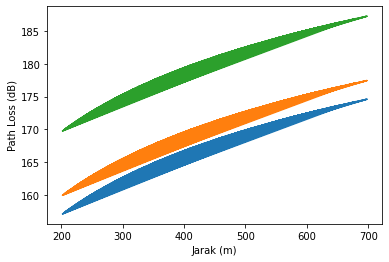

In [36]:
plt.figure()
plt.plot(d,LpUrban700)
plt.plot(d,LpUrban900)
plt.plot(d,LpUrban1800)
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [37]:
d_sort=d[np.argsort(d)]
Urban_sort1=LpUrban700[np.argsort(d)]
Urban_sort2=LpUrban900[np.argsort(d)]
Urban_sort3=LpUrban1800[np.argsort(d)]

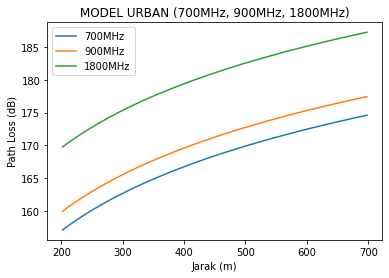

In [38]:
plt.figure()
plt.plot(d_sort,Urban_sort1, label='700MHz')
plt.plot(d_sort,Urban_sort2, label='900MHz')
plt.plot(d_sort,Urban_sort3, label='1800MHz')
plt.legend()
plt.title('MODEL URBAN (700MHz, 900MHz, 1800MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()